<h3>Практическое задание №4. </h3>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import fsolve

In [2]:
Pt = 10             
freq = 2.4e9        
B = 20e6             
GI = 400e-9
data_rate = 57.8
min_SNR = 18      
min_RSSI = -66
req_rate = 1.5*8  
session_duration = 30
request_intensity = 0.8 

<ul> 
    <li>Графически изобразить описанную систему.</li>
<li>Рассчитать максимальную дальность приема точки доступа.</li>
<li>Рассчитать суммарную интенсивность пользовательских запросов на точку доступа.</li>
<li>Составить систему массового обслуживания M/M/N на основе рассчитанных
параметров.</li>
<li>Определить вероятность потери пользовательской сессии и коэффициент
загруженности системы.</li>
</ul>

Максимальная дальность: 62.76 м
Суммарная интенсивность: 1.6500 запросов/с
Система перегружена!
Максимум сессий: 4


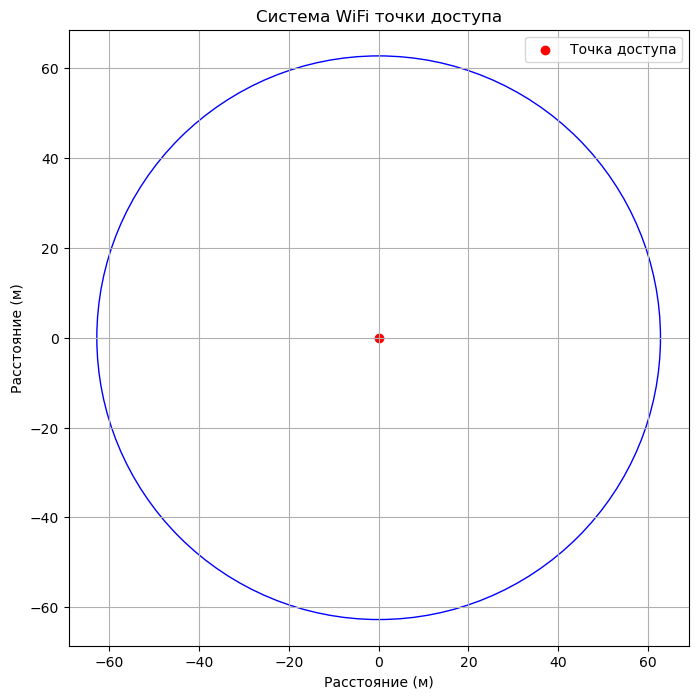

In [3]:
def fspl(d, f, Pt, Pr):
    lambda_ = 3e8/f
    return Pt - (20*np.log10(d) + 20*np.log10(f) + 20*np.log10(4*np.pi/3e8)) - Pr

def equation(d):
    return fspl(d, freq, Pt, min_RSSI)

R_max = fsolve(equation, 100)[0]
print(f"Максимальная дальность: {R_max:.2f} м")

area = np.pi * R_max**2
requests_per_sec = request_intensity * (area/100) / 60
print(f"Суммарная интенсивность: {requests_per_sec:.4f} запросов/с")

mu = 1/session_duration 
lambd = requests_per_sec

if lambd >= mu:
    print("Система перегружена!")

total_capacity = data_rate 
required_per_session = req_rate
max_sessions = math.floor(total_capacity / required_per_session)
print(f"Максимум сессий: {max_sessions}")

fig, ax = plt.subplots(figsize=(8,8))
circle = plt.Circle((0,0), R_max, fill=False, color='blue')
ax.add_patch(circle)
plt.scatter(0,0, color='red', label='Точка доступа')
plt.xlabel('Расстояние (м)')
plt.ylabel('Расстояние (м)')
plt.title('Система WiFi точки доступа')
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.show()